In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
legoset = pd.read_csv('legoset.csv')

In [3]:
#getting all columns names
legoset.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'prod_desc', 'prod_id', 'prod_long_desc', 'review_difficulty',
       'set_name', 'star_rating', 'theme_name', 'val_star_rating', 'country',
       'min_age', 'max_age', 'avg_age', 'price_per_piece'],
      dtype='object')

In [4]:
#removing columns which will not be used for price prediction:
df = legoset.drop(columns=['prod_id','ages','num_reviews','prod_desc', 'prod_long_desc', 'set_name', 'list_price'], axis=1)



In [5]:
df.head()

,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,min_age,max_age,avg_age,price_per_piece
0,277.0,4.0,3,4.5,Angry Birds™,4.0,US,6.0,12.0,9.0,0.108267
1,168.0,4.0,2,5.0,Angry Birds™,4.0,US,6.0,12.0,9.0,0.118988
2,74.0,4.3,2,4.3,Angry Birds™,4.1,US,6.0,12.0,9.0,0.175541
3,1032.0,3.6,3,4.6,Architecture,4.3,US,12.0,99.0,55.5,0.096890
4,744.0,3.2,4,4.6,Architecture,4.1,US,12.0,99.0,55.5,0.107513


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   piece_count        8286 non-null   float64
 1   play_star_rating   8286 non-null   float64
 2   review_difficulty  8286 non-null   int64  
 3   star_rating        8286 non-null   float64
 4   theme_name         8286 non-null   object 
 5   val_star_rating    8286 non-null   float64
 6   country            8286 non-null   object 
 7   min_age            8286 non-null   float64
 8   max_age            8286 non-null   float64
 9   avg_age            8286 non-null   float64
 10  price_per_piece    8286 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 712.2+ KB


In [7]:
data = df.drop(df[df.country.isin(['US', 'CA'])].index)

In [8]:
data.head()

,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,min_age,max_age,avg_age,price_per_piece
569,1032.0,3.6,3,4.6,Architecture,4.3,AU,12.0,99.0,55.5,0.110458
570,744.0,3.2,4,4.6,Architecture,4.1,AU,12.0,99.0,55.5,0.102140
571,597.0,3.7,3,4.9,Architecture,4.4,AU,12.0,99.0,55.5,0.101830
572,780.0,4.4,3,4.7,Architecture,4.3,AU,12.0,99.0,55.5,0.068195
573,598.0,3.7,3,4.2,Architecture,4.1,AU,12.0,99.0,55.5,0.088951


In [9]:
data.to_csv('modeling_data_EU', index=False)


# Dummies for Categorical Data

In [10]:
data = pd.get_dummies(data, columns=['theme_name', 'country' ], drop_first=False)

In [11]:
data.corr()

,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,avg_age,price_per_piece,theme_name_Architecture,...,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT
piece_count,1.000000,0.036189,0.601780,0.088645,0.084541,0.710077,0.347499,0.381820,-0.275619,-0.010285,...,-0.001628,-0.003748,-0.004450,0.003507,0.003507,-0.005300,0.003507,-0.001570,0.007347,0.003365
play_star_rating,0.036189,1.000000,0.171597,0.579342,0.484681,-0.192462,-0.253561,-0.256392,0.052991,-0.142680,...,-0.000895,-0.001406,0.001291,0.000418,0.000418,0.001066,0.000418,-0.000966,-0.005465,0.000900
review_difficulty,0.601780,0.171597,1.000000,0.097159,0.091144,0.499828,0.091542,0.121916,-0.249160,0.088532,...,0.000490,-0.001100,-0.003621,0.001993,0.001993,-0.004225,0.001993,-0.001620,0.009716,0.001656
star_rating,0.088645,0.579342,0.097159,1.000000,0.721239,0.078800,0.143546,0.143092,-0.072403,0.031051,...,-0.001160,-0.002696,0.000466,0.001284,0.001284,-0.001371,0.001284,0.000303,-0.001580,0.002711
val_star_rating,0.084541,0.484681,0.091144,0.721239,1.000000,0.050578,0.121693,0.120201,-0.183247,-0.014374,...,0.000443,-0.002869,-0.000860,0.001624,0.001624,-0.003067,0.001524,0.001455,0.004876,0.002284
min_age,0.710077,-0.192462,0.499828,0.078800,0.050578,1.000000,0.572384,0.617348,-0.339942,0.243100,...,-0.000137,-0.001555,-0.001772,0.001586,0.001586,-0.004292,0.001586,0.000118,0.007963,0.001829
max_age,0.347499,-0.253561,0.091542,0.143546,0.121693,0.572384,1.000000,0.998435,-0.190007,0.276011,...,-0.000277,-0.003380,-0.006685,0.003092,0.003092,-0.005701,0.003092,0.001140,0.009897,0.003489
avg_age,0.381820,-0.256392,0.121916,0.143092,0.120201,0.617348,0.998435,1.000000,-0.205478,0.281384,...,-0.000275,-0.003349,-0.006535,0.003075,0.003075,-0.005762,0.003075,0.001101,0.010039,0.003472
price_per_piece,-0.275619,0.052991,-0.249160,-0.072403,-0.183247,-0.339942,-0.190007,-0.205478,1.000000,-0.072494,...,-0.000734,0.014370,-0.000158,-0.030192,-0.003890,0.031854,0.038740,0.024131,-0.012297,-0.017290
theme_name_Architecture,-0.010285,-0.142680,0.088532,0.031051,-0.014374,0.243100,0.276011,0.281384,-0.072494,1.000000,...,-0.000487,-0.001398,-0.001097,0.000970,0.000970,-0.001598,0.000970,-0.000076,0.002813,0.001076


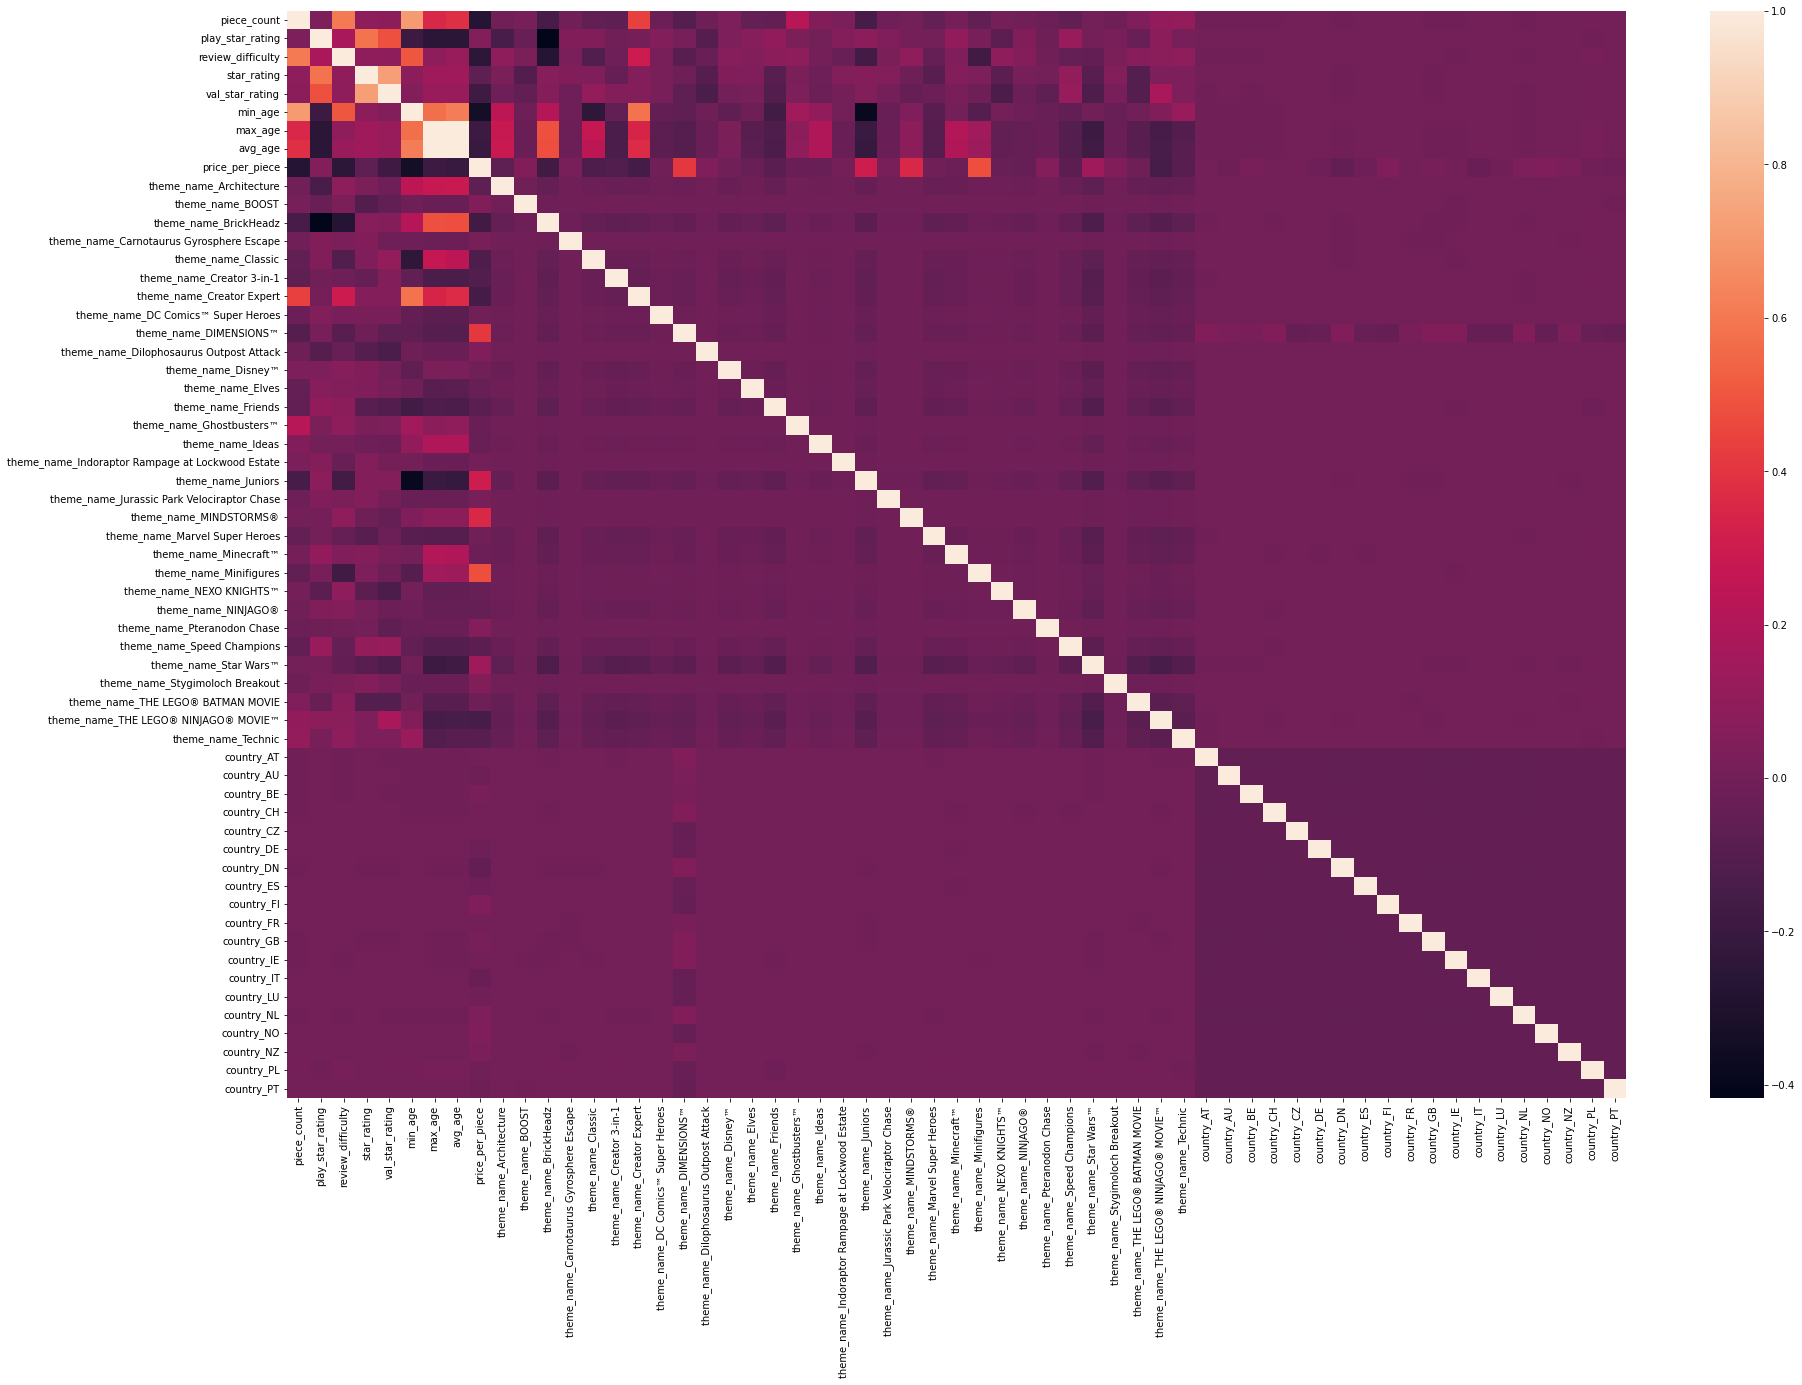

In [12]:
plt.figure(figsize=(30,20))
_ = sns.heatmap(data.corr())

In [13]:
data.columns.values

array(['piece_count', 'play_star_rating', 'review_difficulty',
       'star_rating', 'val_star_rating', 'min_age', 'max_age', 'avg_age',
       'price_per_piece', 'theme_name_Architecture', 'theme_name_BOOST',
       'theme_name_BrickHeadz',
       'theme_name_Carnotaurus Gyrosphere Escape', 'theme_name_Classic',
       'theme_name_Creator 3-in-1', 'theme_name_Creator Expert',
       'theme_name_DC Comics™ Super Heroes', 'theme_name_DIMENSIONS™',
       'theme_name_Dilophosaurus Outpost Attack', 'theme_name_Disney™',
       'theme_name_Elves', 'theme_name_Friends',
       'theme_name_Ghostbusters™', 'theme_name_Ideas',
       'theme_name_Indoraptor Rampage at Lockwood Estate',
       'theme_name_Juniors',
       'theme_name_Jurassic Park Velociraptor Chase',
       'theme_name_MINDSTORMS®', 'theme_name_Marvel Super Heroes',
       'theme_name_Minecraft™', 'theme_name_Minifigures',
       'theme_name_NEXO KNIGHTS™', 'theme_name_NINJAGO®',
       'theme_name_Pteranodon Chase', 'theme_nam

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X= data.drop("price_per_piece", axis=1)

y = data['price_per_piece']

In [16]:
X

,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,avg_age,theme_name_Architecture,theme_name_BOOST,...,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT
569,1032.0,3.6,3,4.6,4.3,12.0,99.0,55.5,1,0,...,0,0,0,0,0,0,0,0,0,0
570,744.0,3.2,4,4.6,4.1,12.0,99.0,55.5,1,0,...,0,0,0,0,0,0,0,0,0,0
571,597.0,3.7,3,4.9,4.4,12.0,99.0,55.5,1,0,...,0,0,0,0,0,0,0,0,0,0
572,780.0,4.4,3,4.7,4.3,12.0,99.0,55.5,1,0,...,0,0,0,0,0,0,0,0,0,0
573,598.0,3.7,3,4.2,4.1,12.0,99.0,55.5,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,341.0,4.4,2,4.3,4.2,7.0,14.0,10.5,0,0,...,0,0,0,0,0,0,0,0,0,1
8282,217.0,4.1,2,3.6,4.1,7.0,14.0,10.5,0,0,...,0,0,0,0,0,0,0,0,0,1
8283,233.0,4.6,2,4.6,4.5,7.0,14.0,10.5,0,0,...,0,0,0,0,0,0,0,0,0,1
8284,48.0,5.0,1,5.0,5.0,6.0,14.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
y

569     0.110458
570     0.102140
571     0.101830
572     0.068195
573     0.088951
          ...   
8281    0.107296
8282    0.112386
8283    0.104669
8284    0.253912
8285    0.111815
Name: price_per_piece, Length: 7149, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [19]:
print(len(X_train))
print(len(X_test))

5719
1430


# Modelling

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [23]:
rf = RandomForestRegressor(n_estimators=200,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))

In [24]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.9397502250760303


In [25]:
rf.feature_importances_

array([4.78880022e-01, 1.54406903e-02, 6.75101816e-03, 8.89072999e-03,
       1.84354042e-02, 6.68077446e-02, 2.81620061e-02, 6.42873817e-02,
       2.87345330e-07, 1.02741306e-03, 5.65287241e-03, 0.00000000e+00,
       5.82260784e-04, 2.68608902e-03, 1.34401953e-03, 1.46129727e-05,
       6.21760023e-02, 1.75868464e-04, 1.82236460e-04, 4.85423617e-06,
       3.17070607e-03, 9.73388174e-06, 5.69234682e-04, 1.60484047e-05,
       3.47052928e-02, 0.00000000e+00, 1.48364986e-01, 7.90088509e-05,
       1.20809404e-03, 8.10382486e-04, 0.00000000e+00, 4.05857813e-04,
       1.55827050e-03, 2.13986130e-05, 2.57760135e-02, 1.02443404e-03,
       2.04785000e-03, 2.58024271e-03, 7.91350084e-04, 9.67506921e-05,
       1.14809446e-03, 1.10835666e-04, 1.39191856e-04, 3.10494713e-04,
       4.18413659e-05, 3.67138580e-03, 8.85696429e-05, 2.05736649e-03,
       3.17462849e-04, 1.85497704e-03, 9.23934358e-05, 7.16225786e-05,
       1.14411486e-04, 1.10209155e-04, 2.14844439e-03, 2.75684333e-03,
      

<BarContainer object of 58 artists>

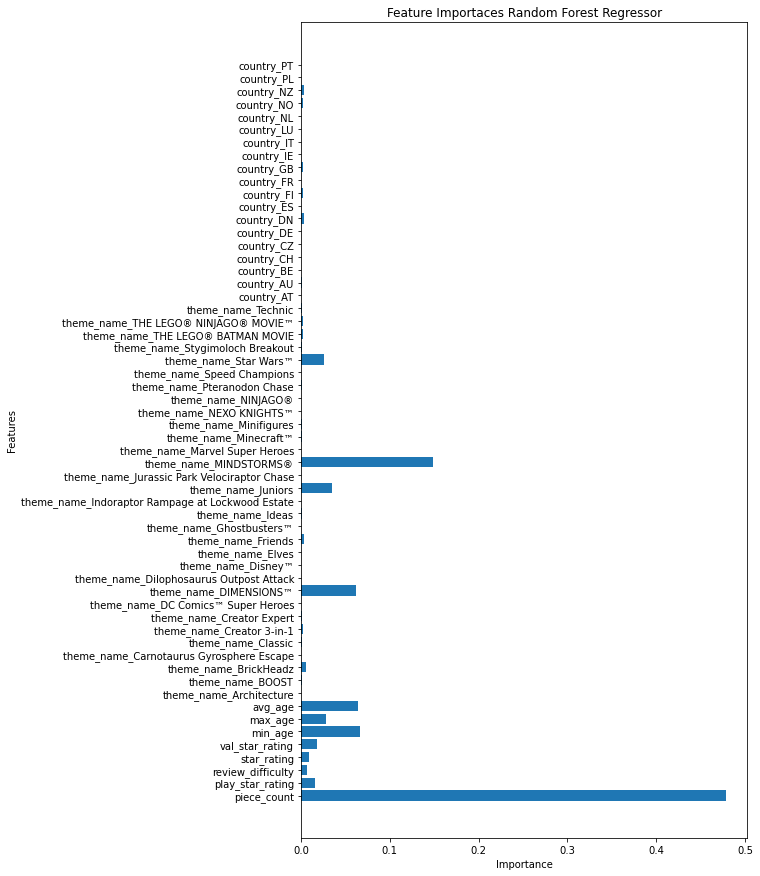

In [26]:
plt.figure(figsize=(8,15))
plt.title('Feature Importaces Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(X_train.columns, rf.feature_importances_)


Text(0.5, 1.0, 'Random Forest Regressor Tested vs Predicted Values')

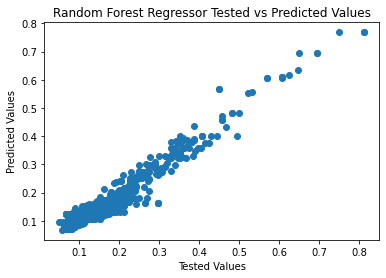

In [27]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Tested Values')
plt.ylabel('Predicted Values')
plt.title("Random Forest Regressor Tested vs Predicted Values")

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distribution Random Forest Regressor')

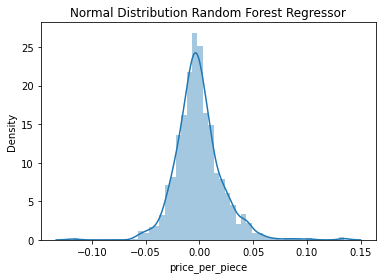

In [28]:
sns.distplot((y_test-y_pred_rf), bins=50);
plt.title('Normal Distribution Random Forest Regressor')

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
#for the linear model it is beneficial to scale data, so the features would be in the similar range:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7149 entries, 569 to 8285
Data columns (total 59 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   piece_count                                       7149 non-null   float64
 1   play_star_rating                                  7149 non-null   float64
 2   review_difficulty                                 7149 non-null   int64  
 3   star_rating                                       7149 non-null   float64
 4   val_star_rating                                   7149 non-null   float64
 5   min_age                                           7149 non-null   float64
 6   max_age                                           7149 non-null   float64
 7   avg_age                                           7149 non-null   float64
 8   price_per_piece                                   7149 non-null   float64
 9   theme_name_Archit

In [32]:
scaled_df = pd.DataFrame(scaled_df, columns = ['piece_count','min_age', 'max_age', 'avg_age', 'play_star_rating',
    'review_difficulty',  
    'star_rating',
    'val_star_rating', 'price_per_piece','theme_name_Architecture','theme_name_BOOST', 'theme_name_BrickHeadz',
       'theme_name_Carnotaurus Gyrosphere Escape', 'theme_name_Classic',
       'theme_name_Creator 3-in-1', 'theme_name_Creator Expert',
       'theme_name_DC Comics™ Super Heroes',
 'theme_name_DIMENSIONS™',
       'theme_name_Dilophosaurus Outpost Attack', 'theme_name_Disney™',
       'theme_name_Elves', 'theme_name_Friends',
       'theme_name_Ghostbusters™', 'theme_name_Ideas',
       'theme_name_Indoraptor Rampage at Lockwood Estate',
       'theme_name_Juniors',
       'theme_name_Jurassic Park Velociraptor Chase',
       'theme_name_MINDSTORMS®',
       'theme_name_Marvel Super Heroes', 'theme_name_Minecraft™',
       'theme_name_Minifigures', 'theme_name_NEXO KNIGHTS™',
       'theme_name_NINJAGO®', 'theme_name_Pteranodon Chase',
       'theme_name_Speed Champions', 'theme_name_Star Wars™',
       'theme_name_Stygimoloch Breakout',
       'theme_name_THE LEGO® BATMAN MOVIE',
       'theme_name_THE LEGO® NINJAGO® MOVIE™', 'theme_name_Technic', 'country_AT', 'country_AU',
       'country_BE', 'country_CH', 'country_CZ',
       'country_DE', 'country_DN', 'country_ES', 'country_FI',
       'country_FR', 'country_GB', 'country_IE', 'country_IT',
       'country_LU', 'country_NL', 'country_NO', 'country_NZ',
       'country_PL', 'country_PT'])

In [33]:
scaled_df.head()

,piece_count,min_age,max_age,avg_age,play_star_rating,review_difficulty,star_rating,val_star_rating,price_per_piece,theme_name_Architecture,...,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT
0,0.427826,-1.057961,0.535791,0.167801,0.071211,1.471235,1.670411,1.70293,-0.510665,6.051968,...,-0.237264,-0.24021,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
1,0.120264,-1.656316,1.768212,0.167801,-0.245190,1.471235,1.670411,1.70293,-0.606370,6.051968,...,-0.237264,-0.24021,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
2,-0.036721,-0.908372,0.535791,0.771427,0.229412,1.471235,1.670411,1.70293,-0.609943,6.051968,...,-0.237264,-0.24021,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
3,0.158709,0.138750,0.535791,0.369010,0.071211,1.471235,1.670411,1.70293,-0.996957,6.051968,...,-0.237264,-0.24021,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
4,-0.035653,-0.908372,0.535791,-0.637035,-0.245190,1.471235,1.670411,1.70293,-0.758138,6.051968,...,-0.237264,-0.24021,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229


In [34]:
X= scaled_df.drop("price_per_piece", axis=1)

y = scaled_df['price_per_piece']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [36]:
linear = linear_model.LinearRegression()

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [38]:
#computing r^2
reg.score(X, y)

0.7975255061823282

In [39]:
reg.coef_

array([-1.75940097e-01,  2.49648768e-02, -6.10929617e-02,  5.05858568e-03,
       -7.71329690e-02,  2.02453555e+10,  2.84778925e+11, -2.96831627e+11,
       -2.54627546e+11, -7.71054886e+10, -4.22218366e+11, -7.24381496e+10,
       -2.53320250e+11, -3.37867248e+11, -3.09717848e+11, -1.98307729e+11,
       -2.74602348e+11, -8.15035886e+10, -2.78167901e+11, -2.13907384e+11,
       -3.68082205e+11, -8.15035886e+10, -1.81273657e+11, -8.15035886e+10,
       -3.90000229e+11, -8.15035886e+10, -8.15035886e+10, -3.28805875e+11,
       -2.76391673e+11, -1.39561028e+11, -1.62354298e+11, -2.27630582e+11,
       -8.15035886e+10, -2.76985192e+11, -5.79573731e+11, -8.15035886e+10,
       -3.77211316e+11, -4.76129508e+11, -3.69763583e+11,  1.03987364e+11,
        1.03358558e+11,  1.03105684e+11,  1.03484704e+11,  1.00924131e+11,
        1.00924131e+11,  1.03736417e+11,  1.00924131e+11,  1.00924131e+11,
        1.02724907e+11,  1.03861986e+11,  1.03484704e+11,  1.00924131e+11,
        1.00924131e+11,  

In [40]:
#the intercept (often labeled the constant) is the expected mean value of Y when all X=0
reg.intercept_

0.0007658071765006018

In [41]:
y_pred = reg.predict(X_test)

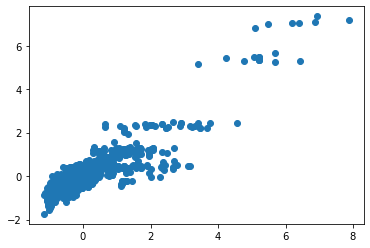

In [42]:
plt.scatter(y_test, y_pred)

# XGBoost

In [43]:
import re
import xgboost as xg

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb_model = XGBRegressor()

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [46]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
xgb_model_predict = xgb_model.predict(X_test)

Text(0, 0.5, 'Features')

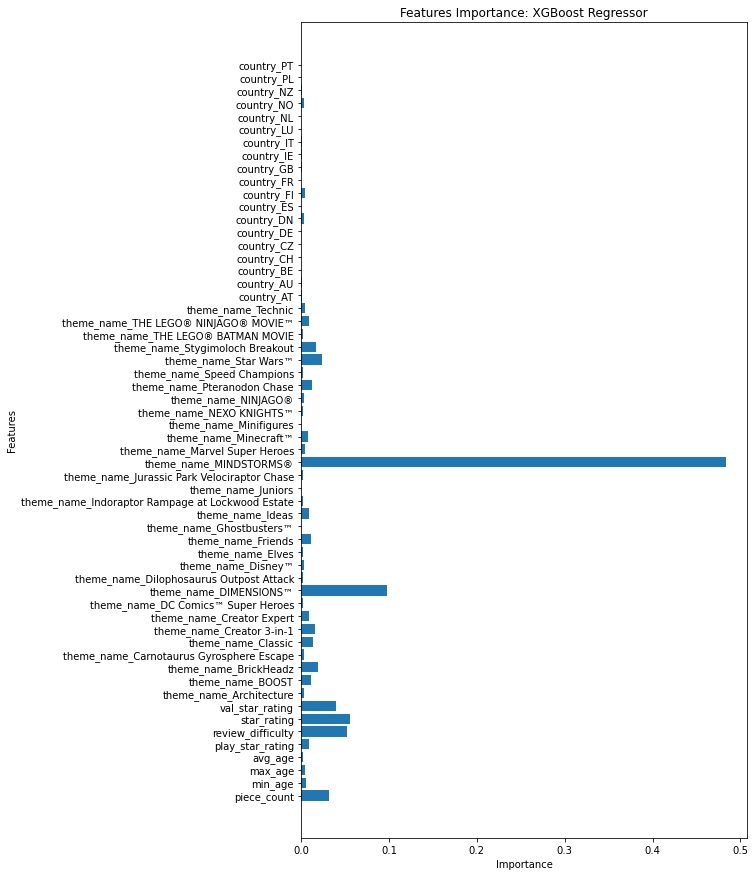

In [48]:
plt.figure(figsize=(8,15))

plt.barh(X_train.columns, xgb_model.feature_importances_)
plt.title('Features Importance: XGBoost Regressor')
plt.xlabel('Importance')
plt.ylabel("Features")

Text(0.5, 1.0, 'XGBoost Regressor: Tested versus Predicted Values')

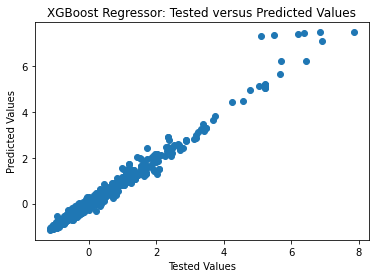

In [49]:
plt.scatter(y_test, xgb_model_predict)
plt.xlabel('Tested Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Tested versus Predicted Values')

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


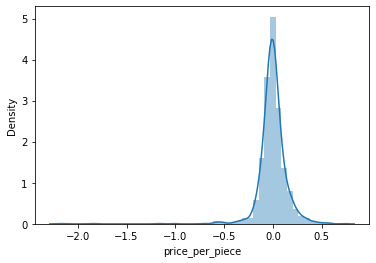

In [50]:
#plotting model to check normalization
sns.distplot((y_test-xgb_model_predict), bins=50);


# Model Evaluation

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import model_selection

In [52]:
models=[]

models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('KN', KNeighborsRegressor()))



In [53]:
results_r2 = []
names = []

scoring = 'r2'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    r2_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results_r2.append(r2_cv)
    names.append(name)
    r2 = (name),'%s, %.3f, %.3f'% (r2_cv.mean(), r2_cv.var(), r2_cv.std())
    print(r2)

('RF', '0.9802049497094355, 0.000, 0.004')
('XGB', '0.9840201255163457, 0.000, 0.002')
('LR', '0.7876731004931697, 0.001, 0.032')
('DT', '0.9719858975071384, 0.000, 0.004')
('KN', '0.7579037990051753, 0.002, 0.041')


In [54]:
results_mse = []
names = []

scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    mse_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results_mse.append(mse_cv)
    names.append(name)
    mse = (name),'%s: %.3f, %.3f'% (mse_cv.mean(), mse_cv.var(), mse_cv.std())
    print(mse)

('RF', '-0.01926864359655696: 0.000, 0.003')
('XGB', '-0.015544696468876646: 0.000, 0.002')
('LR', '-0.20624909680153816: 0.001, 0.026')
('DT', '-0.027534417885392397: 0.000, 0.004')
('KN', '-0.2346964030386239: 0.001, 0.030')


/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_6443/3127024402.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


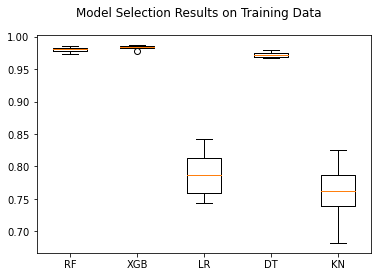

In [55]:
#Plotting Results r2

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results_r2)
plt.show()

/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_6443/526562646.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


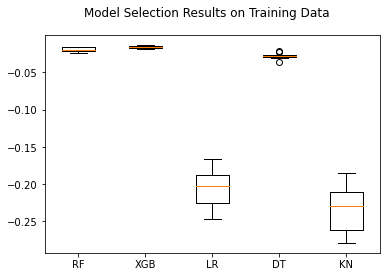

In [56]:
#Plotting Results mse

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results_mse)
plt.show()

Best Performances are given by tree models: XGBoost Regression is giving the highest r2 score and mse score.


# Predictions

In [57]:
# Using XGBoost model for price prediction on test data
prediction = rf.predict(X_test[:10])

In [58]:
X_test[:10]

,piece_count,min_age,max_age,avg_age,play_star_rating,review_difficulty,star_rating,val_star_rating,theme_name_Architecture,theme_name_BOOST,...,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT
3006,-0.211861,0.138750,0.535791,0.369010,-0.086989,-0.009319,-0.566255,-0.543898,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
6074,-0.553596,1.036283,-0.696631,0.972636,1.178614,0.730958,1.670411,1.652439,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,4.238262,-0.226888,-0.23229
826,-0.433989,1.036283,-0.696631,-1.039452,-0.403390,-0.379458,-0.618882,-0.619633,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
4573,0.230260,-0.758783,0.535791,-2.246706,-1.194392,-0.379458,-0.618882,-0.619633,-0.165236,20.482417,...,-0.237264,-0.240210,-0.239231,4.298786,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
4001,-0.410495,1.036283,0.535791,0.167801,0.862213,-0.009319,1.670411,1.601949,-0.165236,-0.048822,...,-0.237264,4.163024,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
4040,-0.483113,1.036283,-0.696631,0.972636,1.178614,-0.379458,-0.566255,-0.569143,-0.165236,-0.048822,...,-0.237264,4.163024,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
1724,-0.148853,0.587516,0.535791,-0.435826,-0.403390,-0.379458,-0.566255,-0.569143,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
5016,0.012403,0.138750,0.535791,0.570218,-1.194392,-0.009319,-0.566255,-0.543898,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,4.298786,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
447,2.177085,-0.160428,1.768212,-0.234617,-0.086989,2.951790,1.670411,1.803911,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
2248,0.450252,-0.459605,0.535791,-1.039452,-0.719791,0.360819,-0.566255,-0.518652,-0.165236,-0.048822,...,-0.237264,-0.240210,-0.239231,-0.232624,-0.232624,-0.240861,-0.232624,-0.235946,-0.226888,-0.23229
